In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(0.,6.)

In [3]:
w = torch.rand(1, requires_grad=True)

In [4]:
def f(x):
    return 3*x

In [5]:
y_true = f(x)

# Understanding the Loss and Parameters relationships

In [6]:
loss_list = []
w_grad = []

w_range = torch.arange(-5.,6., requires_grad=True)
for w_temp in w_range:
    y_pred = x*w_temp
    loss = (y_pred-y_true)**2
    loss_list.append(loss.mean())
    loss.mean().backward()

Text(0, 0.5, 'loss')

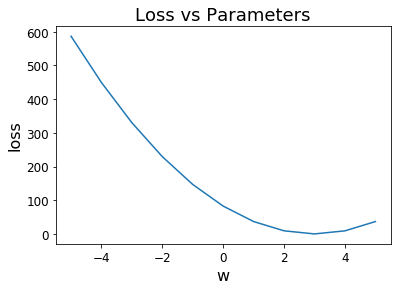

In [7]:
plt.plot(w_range.detach().numpy(), loss_list)
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)

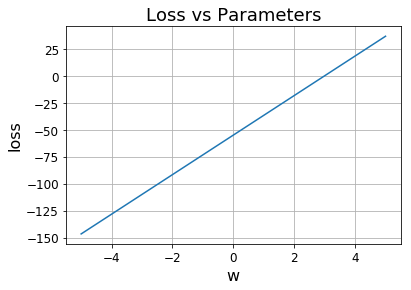

In [8]:
plt.plot(w_range.detach().numpy(), w_range.grad.numpy())
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(True)

# Backpropagation

In [9]:
w_history = []
wgrad_history = []
w_history.append(w.data.clone())

In [10]:
print("Initial value of w = {0:.5f}".format(w.data[0]))

Initial value of w = 0.70553


## Step 1: Calculate the loss

In [11]:
y_pred = x*w
def mse(y_true, y_pred):
    delta = y_true - y_pred
    return (delta**2).mean()

loss = mse(y_true, y_pred)

## Step 2: Calculate the gradients of the weights

$ \large
\begin{align} 
\frac{\partial{J}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}\sum_{i=0}^{N}(y_i-wx_i)^2 \\ 
\large &= 2\sum_{i=0}^{N}(y_i-wx_i)(-x_i)
\end{align}
$

### Step 2.1: Math Approach

In [12]:
torch.mean(2*(y_true - w*x)*(-x)) # Gradient in pytorch is just the average gradient

tensor(-42.0653, grad_fn=<MeanBackward0>)

### Step 2.2: Pytorch Approach

In [13]:
loss.backward()

In [14]:
w.grad

tensor([-42.0653])

In [15]:
wgrad_history.append(w.grad.data.clone())

In [16]:
w

tensor([0.7055], requires_grad=True)

### Step 3: Update weights

In [17]:
lr = 1e-2
with torch.no_grad():
    w -= w.grad * lr

In [18]:
w

tensor([1.1262], requires_grad=True)

In [19]:
w_history.append(w.data.clone())

## Step 4: Repeat

In [20]:
with torch.no_grad():
    w.grad.zero_() # remove the gradient
y_pred = x*w
loss = mse(y_true, y_pred)
loss.backward()

In [21]:
wgrad_history.append(w.grad.clone())

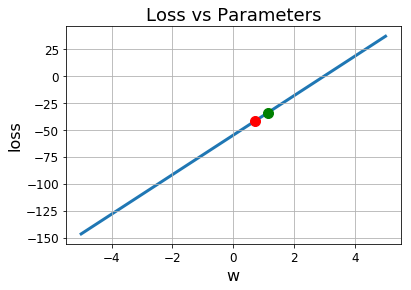

In [22]:
plt.plot(w_range.detach().numpy(), w_range.grad.numpy(), linewidth=3, zorder=-1)
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(True)
plt.scatter(w_history[0].detach(),wgrad_history[0], c='red', s=100)
plt.scatter(w_history[1].detach(),wgrad_history[1], c='green', s=100)

In [23]:
w_history

[tensor([0.7055]), tensor([1.1262])]

In [24]:
w_history

[tensor([0.7055]), tensor([1.1262])]